In [4]:
import numpy as np
from numpy import sin
import random
import math

def func(x):
    return 2*sin(0.5*x + 0.78) + 0.8

x = np.array([0.5, 2.5, 4.5, 6.5, 8.5, 10.5])
y_perfect = func(x)

def uniform_range(minimum: float,
                  maximum: float) -> float:
    """
    Generation of a pseudo-casual number distributed accordingly to uniform distribution between
    [minimum, maximum)

    Args:
        minimum: lower limit of the range (included)
        maximum: upper limit of the range (excluded)

    Returns:
        A pseudo-casual numbers generated according to uniform distribution between [minimum, maximum)
    """

    return minimum + (random.random() * (maximum - minimum))

def clt_ms(mean: float,
           sigma: float,
           n_sum: int = 10) -> float:
    """
    Generation of a pseudo-casual number distributed accordingly to the gaussian distribution
    with the central limit theorem algorithm between known mean value and standard deviation

    Args:
        mean: mean value
        sigma: standard deviation
        n_sum: number of repetitions used in the algorithm (optional, default: 10)

    Returns:
        A pseudo-casual numbers generated according to gaussian distribution specified

    """

    y = 0.
    delta = math.sqrt(3 * n_sum) * sigma
    minimum = mean - delta
    maximum = mean + delta
    for i in range(n_sum):
        y += uniform_range(minimum, maximum)
    y /= n_sum
    return y

y = clt_ms(y_perfect, 0.3)


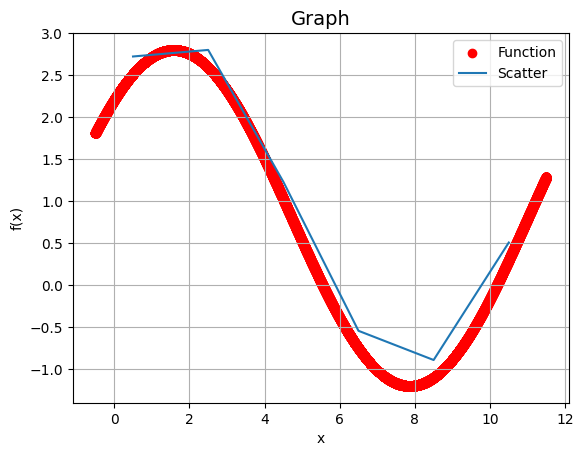

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.errorbar(x, y, label="Scatter")
xcoord = np.linspace(min(x)-1, max(x)+1, 100000)
ycoord = []
for i in range(len(xcoord)):
    ycoord.append(func(xcoord[i]))
ax.scatter(xcoord, ycoord, label="Function", color="red")

ax.set_title("Graph", size=14)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(True)
ax.legend()

plt.savefig('Scatter.png')
plt.show()

In [22]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

def function(x, p0, p1, p2, p3):
    return p0 * sin(p1*x + p2) + p3

least_squares = LeastSquares(x, y, 0.3, function)
my_minuit = Minuit(least_squares, p0=1, p1=0, p2=0, p3=0)
my_minuit.migrad()
my_minuit.hesse()
display(my_minuit)
display(my_minuit.covariance.correlation())

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.0001133 (χ²/ndof = 0.0)  │              Nfcn = 272              │
│ EDM = 0.000113 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p0   │   2.00    │   0.18    │            │            │         │         │       │
│ 1 │ p1   │  -0.500   │   0.029   │            │            │         │         │       │
│ 2 │ p2   │   2.36    │   0.21    │            │            │         │         │       │
│ 3 │ p3   │   1.01    │   0.13    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────┐
│    │       p0       p1       p2       p3 │
├────┼─────────────────────────────────────┤
│ p0 │   0.0309  -1.3e-3    0.008   -0.002 │
│ p1 │  -1.3e-3 0.000873  -5.6e-3   1.5e-3 │
│ p2 │    0.008  -5.6e-3   0.0437   -0.010 │
│ p3 │   -0.002   1.5e-3   -0.010   0.0176 │
└────┴─────────────────────────────────────┘

,p0,p1,p2,p3
p0,1,-0.3,0.2,-0.1
p1,-0.3,1,-0.9,0.4
p2,0.2,-0.9,1,-0.4
p3,-0.1,0.4,-0.4,1
